# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

Also note that all of these questions can be answered with one line of code.
____
** Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

In [76]:
import pandas as pd
import seaborn as sns

In [5]:
ecom = pd.read_csv('EcommercePurchases.csv')

**Check the head of the DataFrame.**

In [6]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


** How many rows and columns are there? **

In [10]:
ecom.shape

(10000, 14)

** What is the average Purchase Price? **

In [12]:
ecom['Purchase Price'].mean()

50.34730200000025

** What were the highest and lowest purchase prices? **

In [13]:
ecom['Purchase Price'].max()

99.99

In [14]:
ecom['Purchase Price'].min()

0.0

** How many people have English 'en' as their Language of choice on the website? **

In [15]:
len(ecom[ecom['Language'] == 'en'])

1098

** How many people have the job title of "Lawyer" ? **


In [16]:
len(ecom[ecom['Job'] == 'Lawyer'])

30

** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [17]:
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

** What are the 5 most common Job Titles? **

In [19]:
ecom['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Research officer, political party    27
Name: Job, dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [26]:
ecom[ecom['Lot'] == '90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [40]:
ecom[ecom['Credit Card'] == 4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [61]:
len(ecom[(ecom['CC Provider']=='American Express') & (ecom['Purchase Price'] > 95)])

39

** Hard: How many people have a credit card that expires in 2025? **

In [74]:
def year_expire(date):
    return date.split('/')[1]

ecom[ecom['CC Exp Date'].apply(year_expire) == '25']['CC Exp Date'].count()

1033

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [80]:
def email_pro(email):
    return email.split('@')[1]
top5_email = ecom['Email'].apply(email_pro).value_counts().head(5)
top5_email

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

### Data Visualization

** Implement a bar plot for top 5 most popular email providers/hosts **

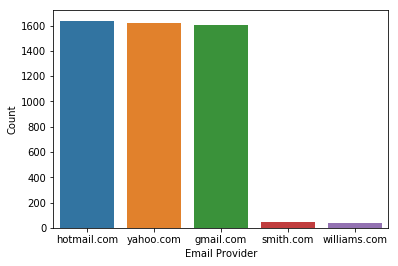

In [83]:
top5 = pd.DataFrame({'Email Provider':top5_email.index, 'Count':top5_email.values})
sns.barplot(x="Email Provider", y="Count", data=top5)

** Plot distribution of Purchase Price **

C:\Users\minh.tran\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


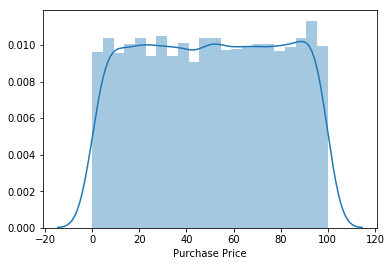

In [87]:
sns.distplot(ecom['Purchase Price'])

** Implement countplot on Language **

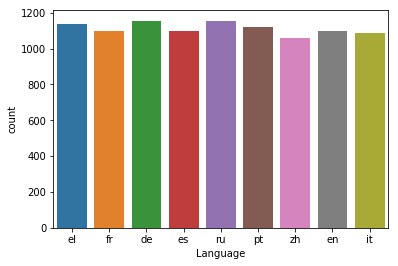

In [88]:
sns.countplot(ecom['Language'])

In [89]:
ecom.corr

<bound method DataFrame.corr of                                                 Address    Lot AM or PM  \
0     16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1     9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                      Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3                 7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4     23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   
5     7502 Powell Mission Apt. 768\nTravisland, VA 3...  21 XT       PM   
6        93971 Conway Causeway\nAndersonburgh, AZ 75107  96 Xt       AM   
7     260 Rachel Plains Suite 366\nCastroberg, WV 24...  96 pG       PM   
8               2129 Dylan Burg\nNew Michelle, ME 28650  45 JN       PM   
9       3795 Dawson Extensions\nLake Tinafort, ID 88739  15 Ug       AM   
10        650 Elizabeth Park\nLake Maria, LA 13526-2530  65 Yn       PM   
11               349 Laurie Parks\nThomasview, ID 08970  30 kK      

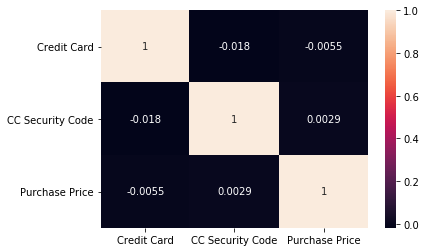

In [90]:
sns.heatmap(ecom.corr(), annot = True)

# Great Job!